# 3. Classification

---

### Setup

In [13]:
import sys
sys.path.insert(1, '../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import train_test_split

data: pd.DataFrame = pd.read_csv('qsar_oral_toxicity_after_preparation.csv', sep=';')

## 3.0. Training Models

---

### Training Models

---

#### train_test_split function
After loading the data, in data dataframe, we need to separate the target variable (exp) from the rest of the data, since it plays a different role in the training procedure. Through the application of the pop method, we get the class variable, and simultaneously removing it from the dataframe. So, y will keep the ndarray with the target variable for each record and X the ndarray containing the records themselves.

In [14]:
target = 'exp'
positive = 'positive'
negative = 'negative'
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

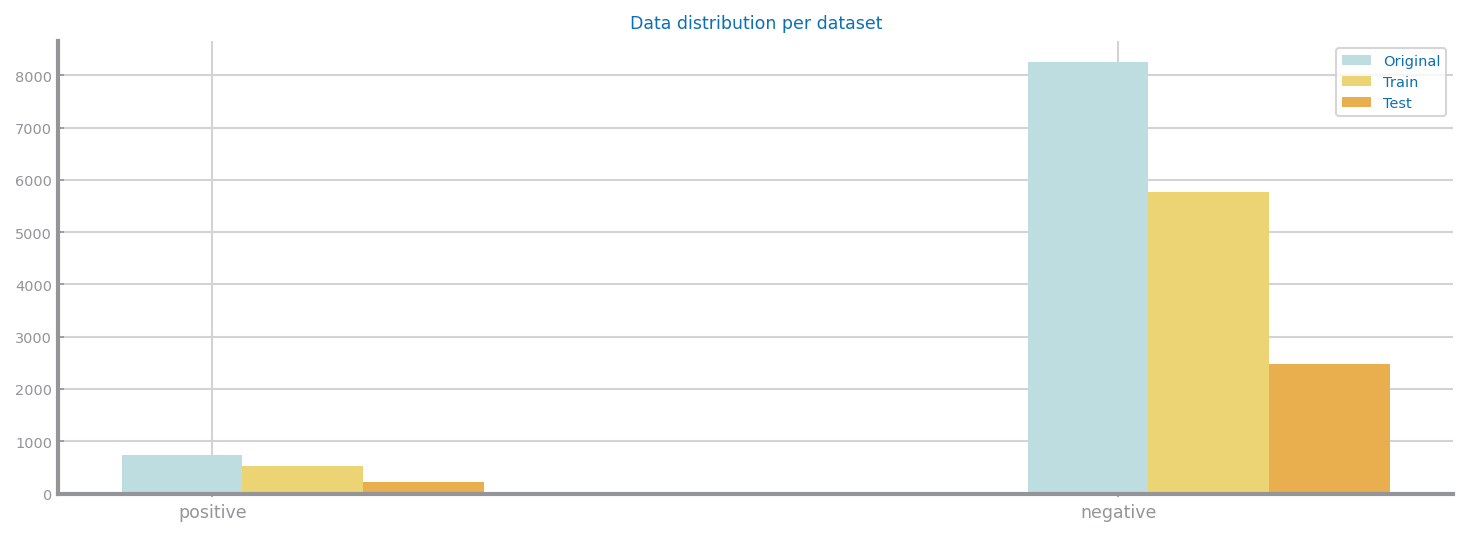

In [15]:
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
values['Train'] = [len(np.delete(trnY, np.argwhere(trnY==negative))), len(np.delete(trnY, np.argwhere(trnY==positive)))]
values['Test'] = [len(np.delete(tstY, np.argwhere(tstY==negative))), len(np.delete(tstY, np.argwhere(tstY==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per dataset', showXTickLabels = True)
plt.show()

We have just plotted the chart of one split because the splits have identical distribution which will make the bar charts equal.

### Evaluation

---

#### Accuracy
The simplest measure is accuracy, which reports the percentage of correct predictions. It is just the opposite of error. In sklearn, accuracy is reported through the score method from each classifier, after its training and measured over a particular dataset and its known labels.

In [16]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(trnX, trnY)
clf.score(tstX, tstY)

0.7461082283172721

In our example we can see that naive Bayes is better with some splits than others.

#### Confusion Matrix
The simplest measure is accuracy, which reports the percentage of correct predictions. It is just the opposite of error. In sklearn, accuracy is reported through the score method from each classifier, after its training and measured over a particular dataset and its known labels.

In [17]:
import numpy as np
import sklearn.metrics as metrics

labels: np.ndarray = pd.unique(y)
prdY: np.ndarray = clf.predict(tstX)
cnf_mtx: np.ndarray = metrics.confusion_matrix(tstY, prdY, labels)
cnf_mtx

array([[1868,  608],
       [  77,  145]])

<Figure size 600x450 with 0 Axes>

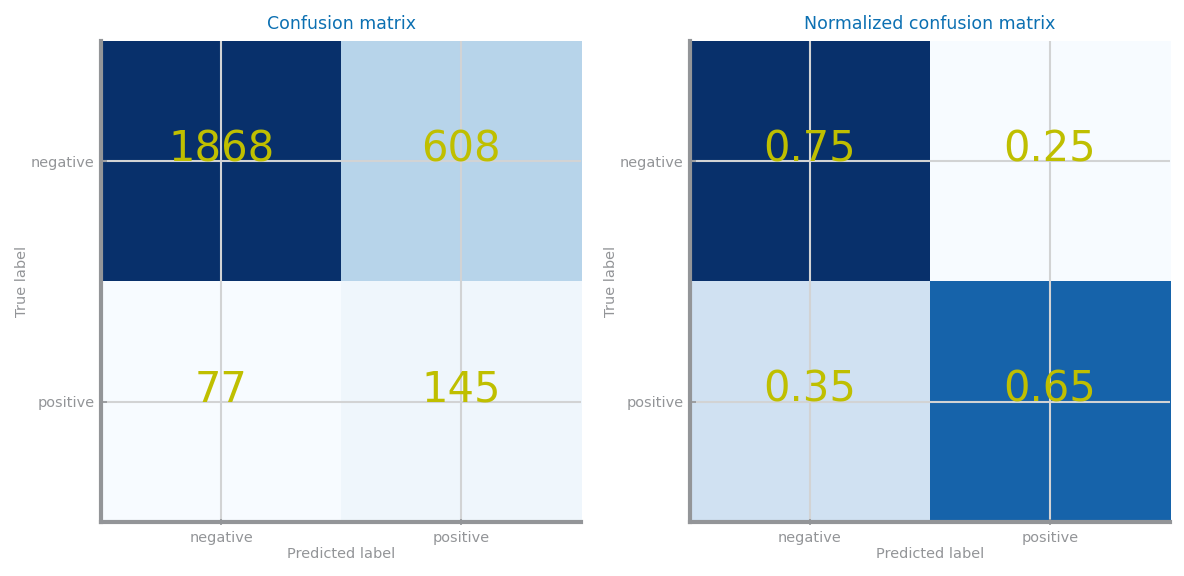

In [18]:
import itertools
import matplotlib.pyplot as plt
CMAP = plt.cm.Blues

def plot_confusion_matrix(cnf_matrix: np.ndarray, classes_names: np.ndarray, ax: plt.Axes = None,
                          normalize: bool = False):
    if ax is None:
        ax = plt.gca()
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), color='y', horizontalalignment="center", size=20)

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
plot_confusion_matrix(cnf_mtx, labels, ax=axs[0,0])
plot_confusion_matrix(metrics.confusion_matrix(tstY, prdY, labels), labels, axs[0,1], normalize=True)
plt.tight_layout()
plt.show()

#### Classification metrics

In [19]:
print('Recall Score: ', metrics.recall_score(tstY, prdY, pos_label = 'positive'))
print('Precision Score: ', metrics.precision_score(tstY, prdY, pos_label = 'positive'))
print('F1 Score: ', metrics.f1_score(tstY, prdY, pos_label = 'positive'))
print('Balanced Accuracy Score: ', metrics.balanced_accuracy_score(tstY, prdY))

Recall Score:  0.6531531531531531
Precision Score:  0.19256308100929614
F1 Score:  0.29743589743589743
Balanced Accuracy Score:  0.7037979012938624


In [20]:
print('Accuracy if it classifies everything as negative:\n', sum(cnf_mtx[0]) / sum(cnf_mtx[0] + cnf_mtx[1]))

Accuracy if it classifies everything as negative:
 0.9177168272794662


## 3.1. Naive Bayes

---

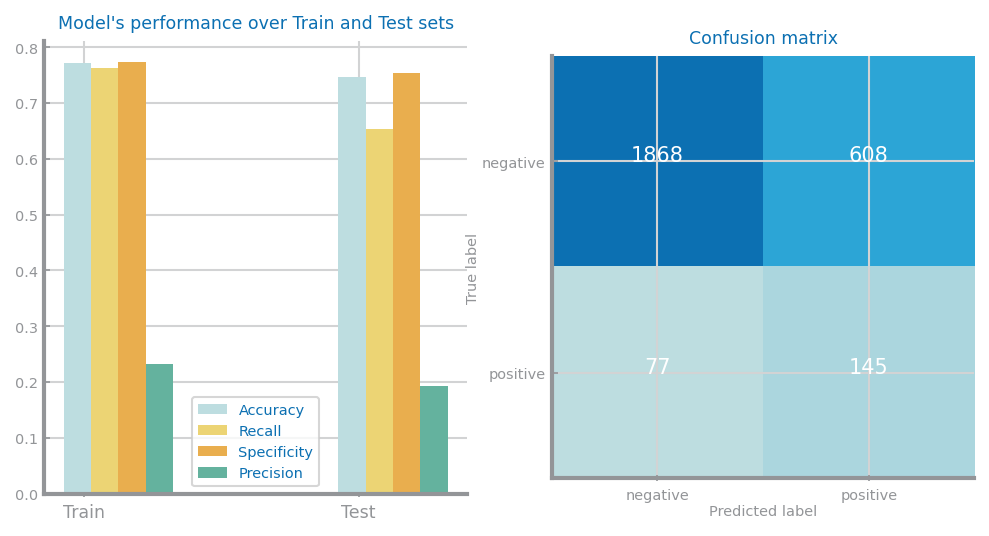

In [21]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst, showXTickLabels=True)

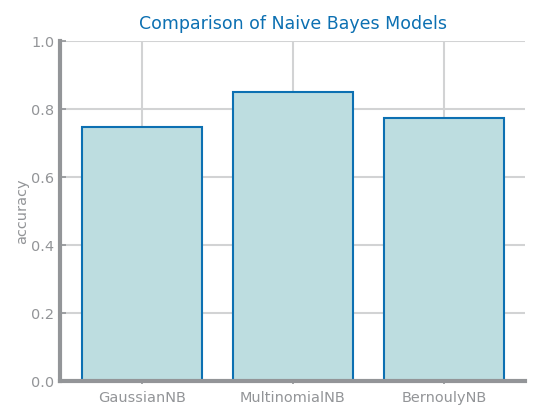

In [22]:
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulyNB': BernoulliNB()}

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX, trnY)
    prdY = estimators[clf].predict(tstX)
    yvalues.append(metrics.accuracy_score(tstY, prdY))

plt.figure()
ds.bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models', ylabel='accuracy', percentage=True)
plt.show()

### Summary

---

***Which distribution is more adequate to model our data?***

The Multinomial distribution models better our data.

***Is the accuracy achieved good enough?***

No. If the model classified everything as negative, its accuracy would be higher (around 0.92), although other measures such as precision would be worse. But in the point of view of accuracy, its value in the test set (around 0.75) is very low, and can probably be better with a different algorithm.


***What is the largest kind of errors?***

False positives.


## 3.2. KNN

---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
best = (0, '')
last_best = 0
for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(trnX, trnY)
        prdY = knn.predict(tstX)
        yvalues.append(metrics.accuracy_score(tstY, prdY))
        if yvalues[-1] > last_best:
            best = (n, d)
            last_best = yvalues[-1]
    values[d] = yvalues

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()
print('Best results with %d neighbors and %s'%(best[0], best[1]))

In [ ]:
clf = knn = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Summary

---

***How do models improve with the increase of neighbors?***

The best result was with 7 neighbors. From that point on, the results seem to stabilize.

***How does performance changes with different distance measures?***

The Chebyshev measure doens't seem very appropriate for this dataset. It is almost always worse or similar to the other 2 in terms of performance (accuracy).
Manhattan and Euclidean measures are similar.

***What is the best parametrisation (number of neighbors and distance measure)?***

The best parametrisation is 7 neighbors with euclidean/manhattan.

***Is the accuracy achieved good enough?***

No. If the model classified everything as negative, its accuracy would be similar (around 0.92), although other measures such as precision would be worse. But in the point of view of accuracy, its value in the test set is not very good, as a classifier as simple as the one described before, it would get a similar result.

***What is the largest kind of errors?***

False negative.

***Is it possible to identify overfitting?***

Yes. Especially by comparing the precision and recall, we can conclude that the model is much more adjusted to the train set than to the test set.


## 3.3. Decision Trees

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# TODO: escala nao deixa ver bem as linhas todas correct it?

min_impurity_decrease = [0.0025, 0.001, 0.0005, 0.00025, 0.0001, 0.00005, 0.000025, 0.00001]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_tree = None

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_tree = tree

        values[d] = yvalues
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True) #TODO: yscale

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%f ==> accuracy=%f'%(best[0], best[1], best[2], last_best))

In [ ]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, out_file='dtree.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('dtree.png'))
plt.axis('off')
plt.show()

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### Overfitting

In [ ]:
max_depths = [best[1]]

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        yvalues_train = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            prdY_train = tree.predict(trnX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            yvalues_train.append(metrics.accuracy_score(trnY, prdY_train))
        values['test'] = yvalues
        values['train'] = yvalues_train
    ds.multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title='Decision Trees with %s criteria'%f,
                           xlabel='min_impurity_decrease', ylabel='accuracy', percentage=True)

plt.show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%f ==> accuracy=%f'%(best[0], best[1], best[2], last_best))

### Summary

---

- ***How do models improve with the increase of max_depth?***

Models with lower max_depth seem to have higher accuracy than the others when decreasing min_impurity_decrease.

- ***How does performance changes with decrease of min_impurity_decrease?***

Overall, the performance seems to decrease after reaching the maximum accuracy at 0.00025.

- ***How do different criteria impact the model performance?***

Overall they seem to have a small impact in the results.

- ***What is the best parametrisation (criteria, max_depth and min_impurity_decrease)?***

Best results achieved with gini criteria, max_depth=20 and min_impurity_decrease=0.000250 ==> accuracy=0.931060

- ***Is the accuracy achieved good enough?***

The best accuracy is 0.931060 but, in the correlation matrix, we can see that we have a lot of false negatives,this is probably because the sets aren't balanced yet.

- ***What is the largest kind of errors?***

False negatives as stated previously.

- ***Is it possible to identify overfitting?***

Yes, we can identify overfitting but it doesn't seem that significant.



## Random Forests

---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25]
max_features = [.1, .3, .5] #, .7, .9, 1]
best = ('', 0, 0)
last_best = 0
best_tree = None

cols = len(max_depths)
plt.figure()
fig, axs = plt.subplots(1, cols, figsize=(cols*ds.HEIGHT, ds.HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    d = max_depths[k]
    values = {}
    for f in max_features:
        yvalues = []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
            rf.fit(trnX, trnY)
            prdY = rf.predict(tstX)
            yvalues.append(metrics.accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (d, f, n)
                last_best = yvalues[-1]
                best_tree = rf

        values[f] = yvalues
    ds.multiple_line_chart(n_estimators, values, ax=axs[0, k], title='Random Forests with max_depth=%d'%d,
                           xlabel='nr estimators', ylabel='accuracy', percentage=True)

plt.show()
print('Best results with depth=%d, %f features and %d estimators, with accuracy=%f'%(best[0], best[1], best[2], last_best))

In [ ]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)